# Comparative analysis between Differential Evolution Clustering and Expectation-Maximization

In [1]:
import DEC.standard_dec as sdec
import DEC.distributed_dec as ddec
import EM.expectation_maximization as em
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import time

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
DATA_DIR = "data"
N_ITER = 5
N_PARTITIONS = 4

ddec.N_ITER = N_ITER
ddec.N_PARTITIONS = N_PARTITIONS

## Runing Distributed Differential Evolution Clustering

In [3]:
Xd, yd = ddec.load_dataset('2d-10c.dat', delimiter=' ')

In [4]:
start_ddec_time = time.time()
ddec_preds = ddec.differential_clustering_distributed(Xd)
ddec_time = time.time() - start_ddec_time

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


## Running Standard Differential Evolution Clustering

In [5]:
X, y = sdec.load_custom_data(os.path.join(DATA_DIR, '2d-10c.dat'))

Iteration: 1


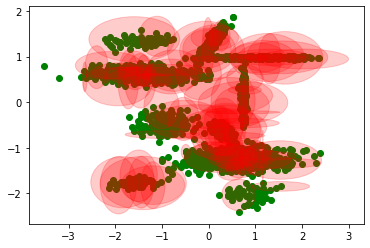

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
ARI: 0.713445672127636


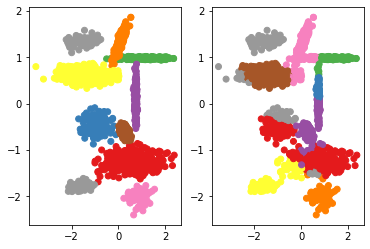

In [6]:
scaler = StandardScaler()

scaler.fit(X)

start_sdec_time = time.time()
sdec_preds = sdec.differential_clustering(scaler.transform(X), y, N_ITER, crowding=True, smart_init=False, wait_on_plots=False, verbose=True)
sdec_time = time.time() - start_sdec_time

## Running Gaussian Mixture

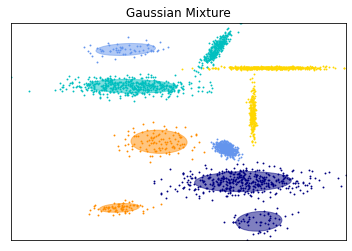

In [7]:
start_em_time = time.time()
gm = em.gaussian_mixture(X, n_clusters=y.max()+1)
em_preds = gm.predict(X)
em_time = time.time() - start_em_time
em.plot_results(X, em_preds, gm.means_, gm.covariances_, 'Gaussian Mixture')

In [8]:
for alg, predictions, y_ in [('EM', em_preds, y), ('DEC', sdec_preds, y), ('Distributed DEC', ddec_preds, yd)]:
    # each cluster contains only members of a single class.
    print(f"Homogeneity score - {alg}:", metrics.homogeneity_score(y_, predictions))
    
    # all members of a given class are assigned to the same cluster.
    print(f"Completeness score - {alg}:", metrics.completeness_score(y_, predictions))
    
    # harmonic mean between homogeneity score and completness score
    print(f"V score - {alg}:", metrics.v_measure_score(y_, predictions))
    
    # measures the similarity of the two assignments
    print(f"ARI - {alg}:", metrics.adjusted_rand_score(y_, predictions))
    print("")

Homogeneity score - EM: 0.9976097881518651
Completeness score - EM: 0.997301837113394
V score - EM: 0.9974557888636963
ARI - EM: 0.9982089084808446

Homogeneity score - DEC: 0.8016595958225794
Completeness score - DEC: 0.7961620933988797
V score - DEC: 0.7989013871934524
ARI - DEC: 0.713445672127636

Homogeneity score - Distributed DEC: 0.8750194058799021
Completeness score - Distributed DEC: 0.8133024457475933
V score - Distributed DEC: 0.8430328875891931
ARI - Distributed DEC: 0.779154787142019



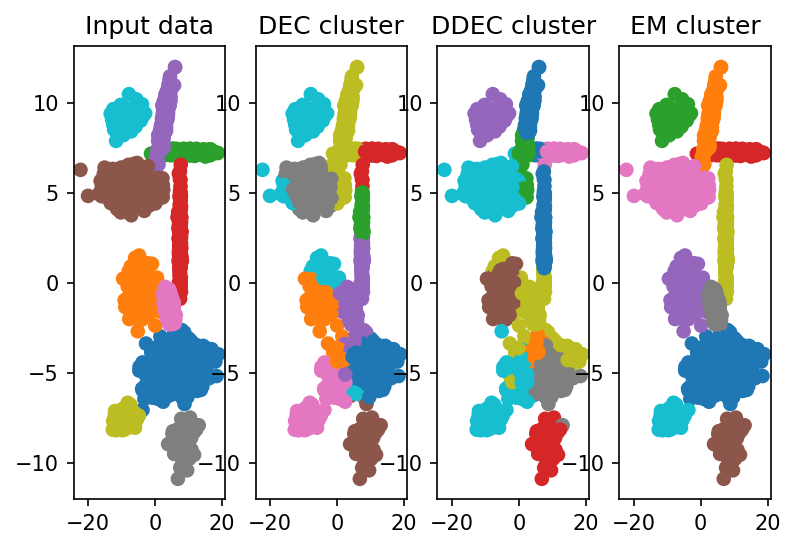

In [9]:
fig, axs = plt.subplots(ncols=4, dpi=150)

axs[0].scatter(X[0], X[1], c=y, cmap='tab10')
axs[0].set_title('Input data')

axs[1].scatter(X[0], X[1], c=sdec_preds, cmap='tab10')
axs[1].set_title('DEC cluster')

axs[2].scatter(X[0], X[1], c=ddec_preds, cmap='tab10')
axs[2].set_title('DDEC cluster')

axs[3].scatter(X[0], X[1], c=em_preds, cmap='tab10')
axs[3].set_title('EM cluster')

plt.show()
plt.close(fig)

## Execution time

In [10]:
execution_times = np.array(sorted([[sdec_time, 'SDEC'], [ddec_time, 'DDEC'], [em_time, 'EM']]))

<AxesSubplot:>

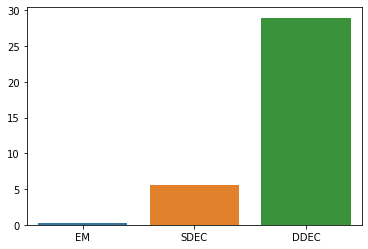

In [11]:
sns.barplot(x=execution_times[:,1], y=execution_times[:,0].astype(np.float))

## Comparative analysis between em and standard DEC 

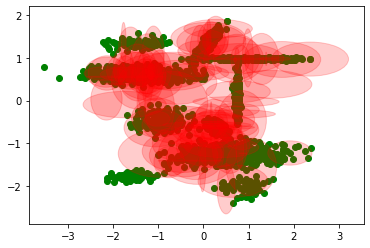

ARI: 0.620476089753973


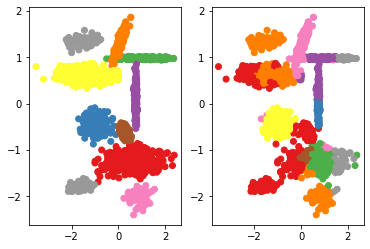

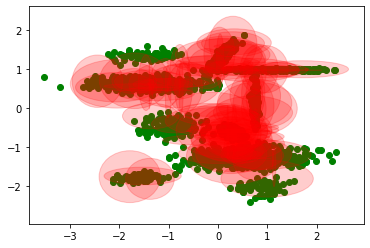

ARI: 0.7452615963064047


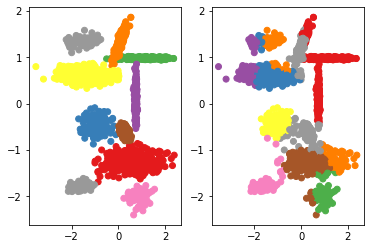

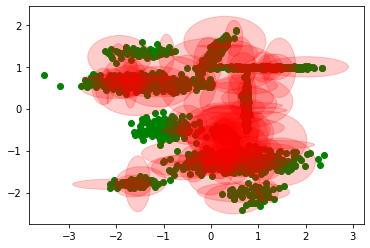

ARI: 0.7237174566612655


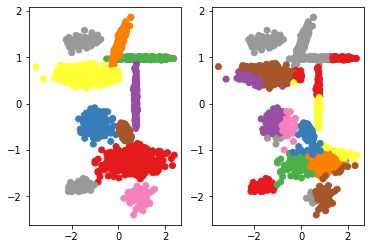

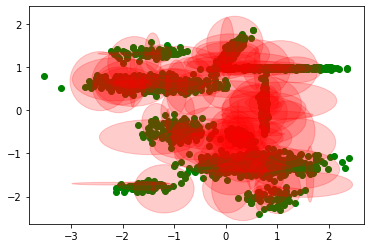

ARI: 0.6191020143365726


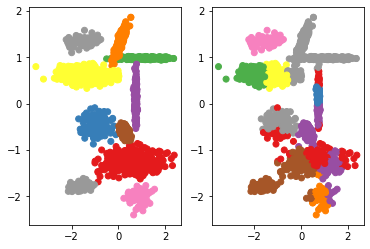

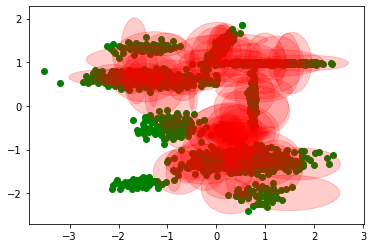

ARI: 0.5920453074545883


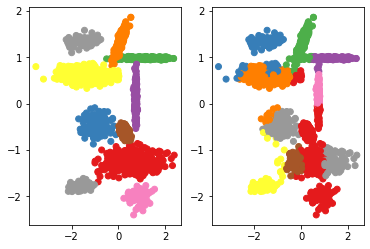

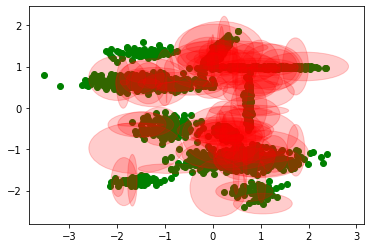

ARI: 0.6519412544080915


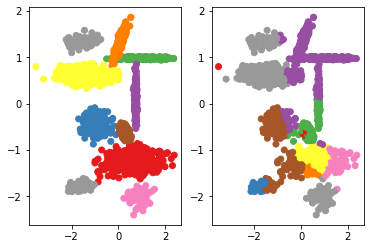

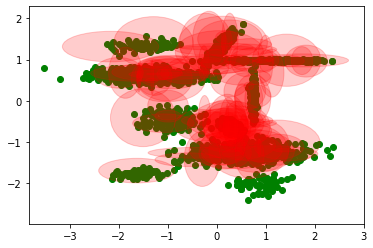

ARI: 0.7969398764391746


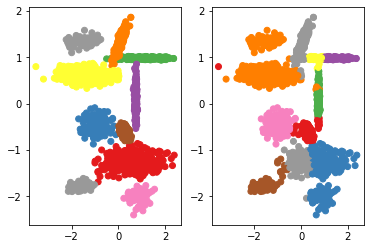

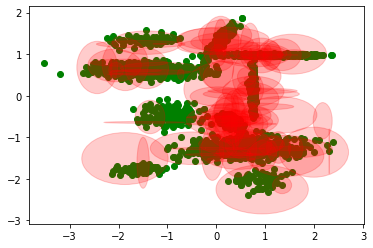

ARI: 0.6677065332032129


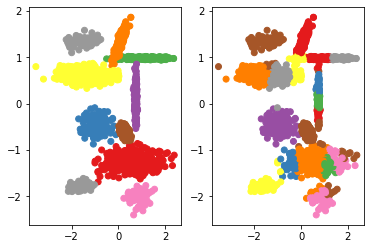

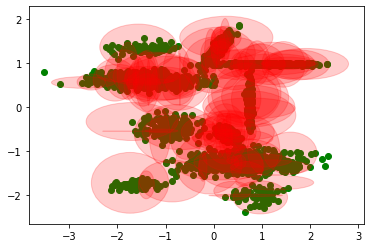

ARI: 0.8799919923120495


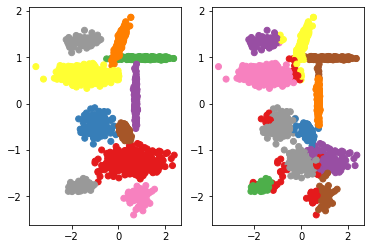

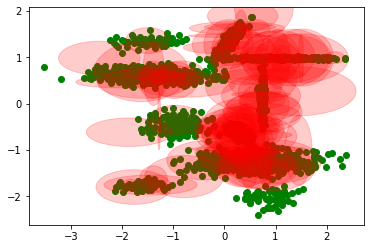

ARI: 0.7342005141550809


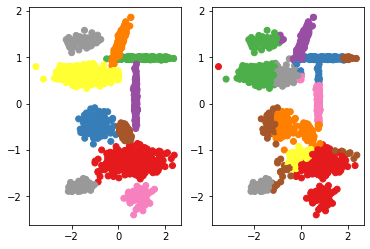

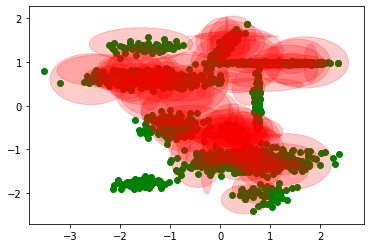

ARI: 0.5329570783081888


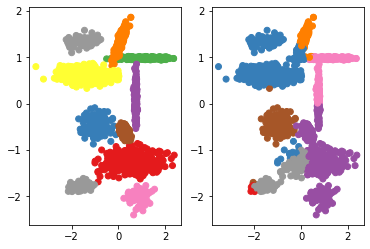

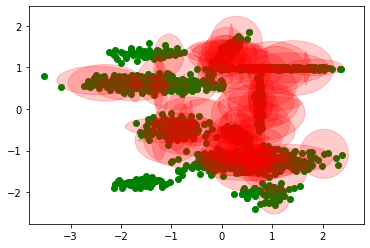

ARI: 0.6960136268847587


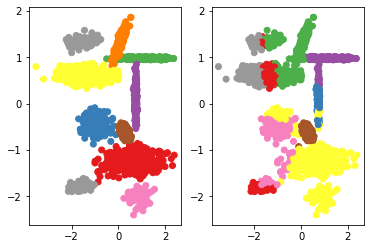

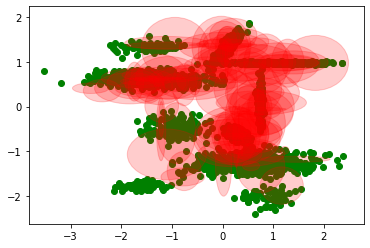

ARI: 0.7555690531001469


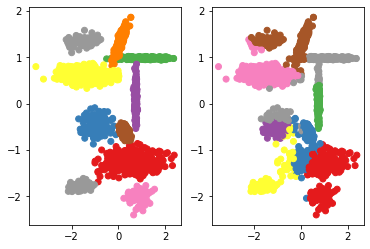

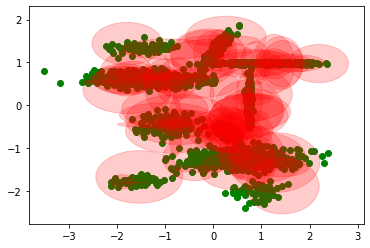

ARI: 0.7721490299954098


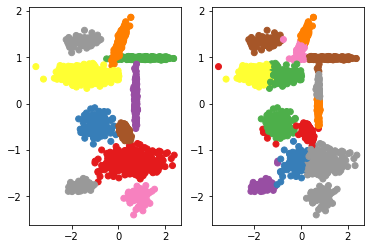

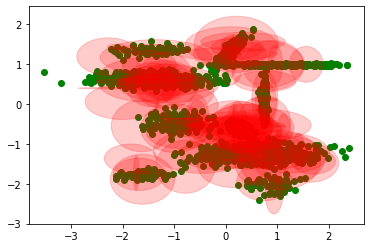

ARI: 0.7847366492661293


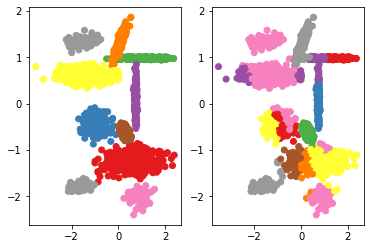

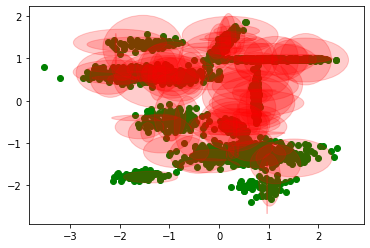

ARI: 0.7443891903402734


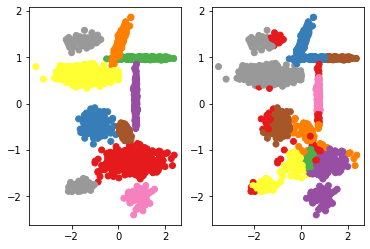

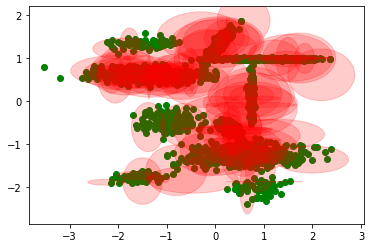

ARI: 0.6255063910417255


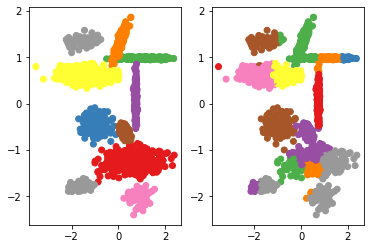

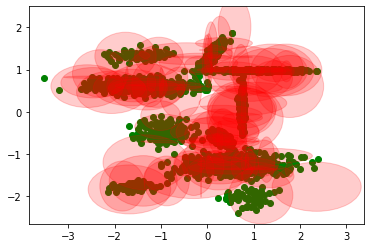

ARI: 0.6635905467835569


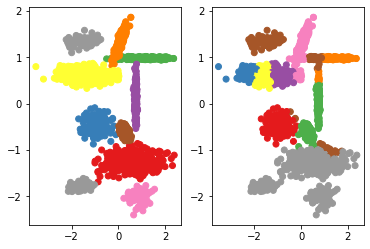

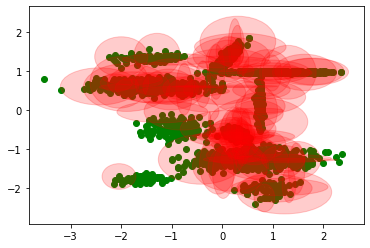

ARI: 0.6633056415543391


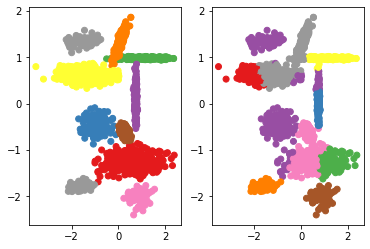

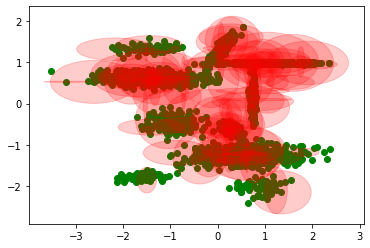

ARI: 0.6841604497026854


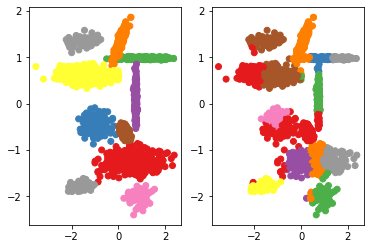

In [12]:
sdec_predictions = []
em_predictions = []

for _ in range(20):
    sdec_preds = sdec.differential_clustering(scaler.transform(X), y, N_ITER, crowding=True, smart_init=False, wait_on_plots=False, verbose=False)
    gm = em.gaussian_mixture(X, n_clusters=y.max()+1)
    em_preds = gm.predict(X)
    
    sdec_predictions.append(sdec_preds)
    em_predictions.append(em_preds)

In [13]:
em_v_scores = []
sdec_v_scores = []

em_ari_scores = []
sdec_ari_scores = []

for alg, predictions, ari_scores, v_scores in [('EM', em_predictions, em_ari_scores, em_v_scores), ('DEC', sdec_predictions, sdec_ari_scores, sdec_v_scores)]:
    # each cluster contains only members of a single class.
    print(f"Homogeneity score mean - {alg}:", sum([metrics.homogeneity_score(y, prediction) for prediction in predictions])/20)
    
    # all members of a given class are assigned to the same cluster.
    print(f"Completeness score mean - {alg}:", sum([metrics.completeness_score(y, prediction) for prediction in predictions])/20)
    
    # harmonic mean between homogeneity score and completness score
    _v_scores = [metrics.v_measure_score(y, prediction) for prediction in predictions]
    v_scores.append(_v_scores)
    print(f"V score mean - {alg}:", sum(_v_scores)/20)
    
    # measures the similarity of the two assignments
    _ari_scores = [metrics.adjusted_rand_score(y, prediction) for prediction in predictions]
    ari_scores.append(_ari_scores)
    print(f"ARI mean - {alg}:", sum(_ari_scores)/20)
    print("")
    
scores = pd.DataFrame()
scores["em_v_score"] = em_v_scores[0]
scores["sdec_v_score"] = sdec_v_scores[0]
scores["em_ari_score"] = em_ari_scores[0]
scores["sdec_ari_score"] = sdec_ari_scores[0]

Homogeneity score mean - EM: 0.9764096154739293
Completeness score mean - EM: 0.9676063921573629
V score mean - EM: 0.971926777340394
ARI mean - EM: 0.950337265084564

Homogeneity score mean - DEC: 0.828080769114421
Completeness score mean - DEC: 0.7931830983172177
V score mean - DEC: 0.8083917338141136
ARI mean - DEC: 0.6976880146003813



In [14]:
scores.describe()

,em_v_score,sdec_v_score,em_ari_score,sdec_ari_score
count,20.000000,20.000000,20.000000,20.000000
mean,0.971927,0.808392,0.950337,0.697688
std,0.034576,0.043147,0.071920,0.081815
min,0.895066,0.694936,0.779875,0.532957
25%,0.947452,0.786364,0.922323,0.645333
50%,0.997456,0.812267,0.998209,0.690087
75%,0.997456,0.821485,0.998209,0.747838
max,0.997456,0.896933,0.998209,0.879992


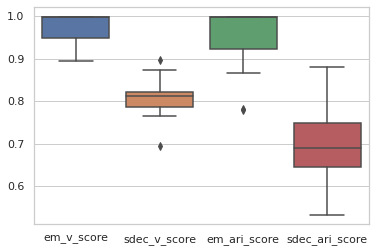

In [15]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=scores)